In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.utils import shuffle
from skimage.transform import resize

In [2]:
pokemon= glob.glob('images/*.jpg')
butterfly = glob.glob('test/*.jpg')
vehicle = glob.glob('Vehicles/*.jpg')
flowers = glob.glob('flowers/*.jpg')

In [3]:
image = []
label = []

for i in butterfly:
    img = plt.imread(i)
    image.append(img)
    label.append(1)
    
for i in flowers:
    img = plt.imread(i)
    image.append(img)
    label.append(3)

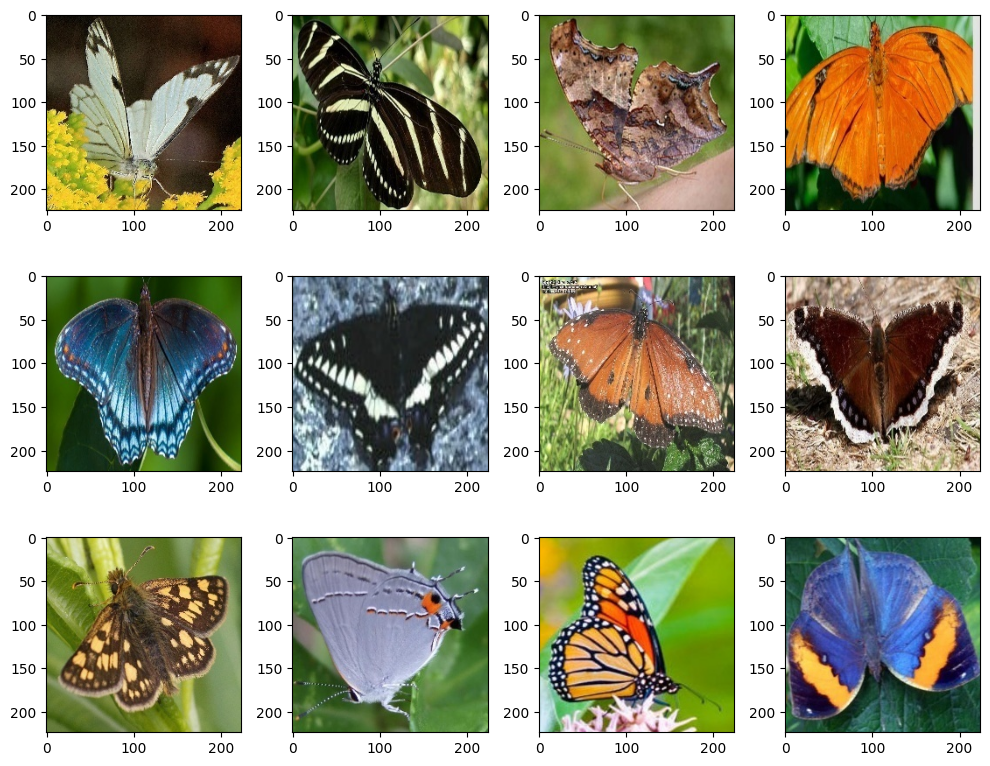

In [4]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
plt.tight_layout()

In [5]:
image, label = shuffle(image, label)

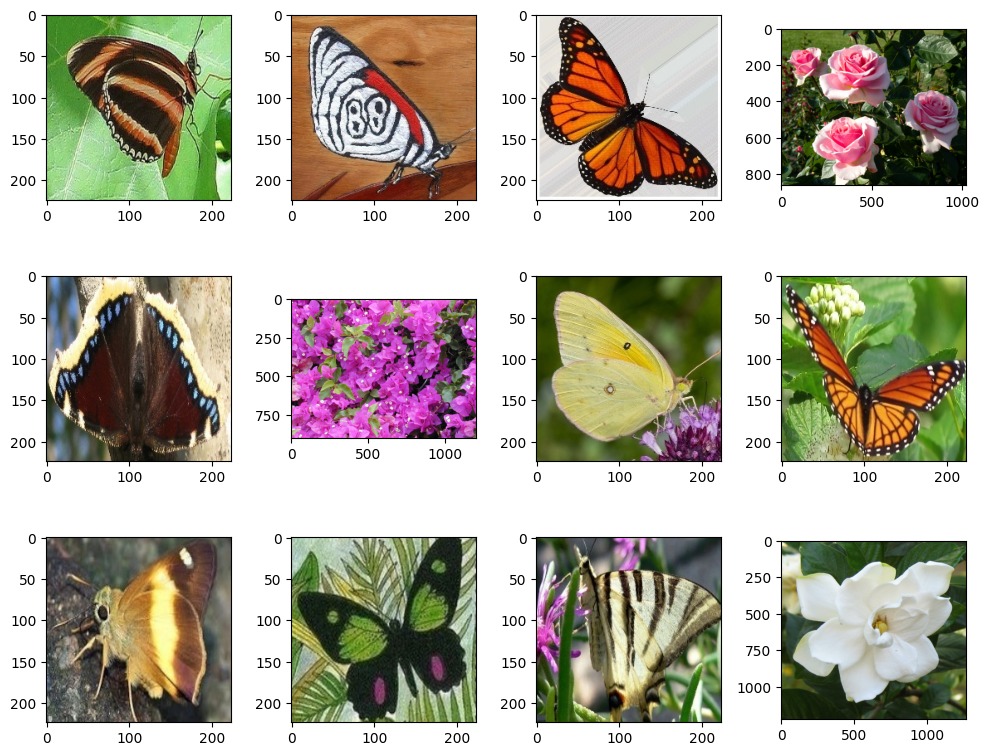

In [6]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
plt.tight_layout()

In [7]:
for i in range(10):
    print(image[i].shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(865, 1024, 3)
(224, 224, 3)
(900, 1200, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [8]:
X = []
for i in image:
    X.append(resize(i, (500,500,3)))


In [9]:
X = np.array(X, dtype=np.uint8)  


In [10]:
y = np.array(label)

In [11]:
d1, d2, d3, d4 = X.shape

In [22]:
X = X.reshape((d1, d2*d3*d4))
X_small = X[:1000] 
y_small = y[:1000]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_small,y_small, test_size = 0.2)

In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()



In [29]:
%time model.fit(X_train, y_train)

CPU times: total: 3min 42s
Wall time: 7min 37s


RandomForestClassifier()

In [30]:
%time y_pred = model.predict(X_test)

CPU times: total: 188 ms
Wall time: 444 ms


In [36]:
model.score(X_train,y_train)

0.89375

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
accuracy_score(y_test,y_pred)

0.78

<Axes: >

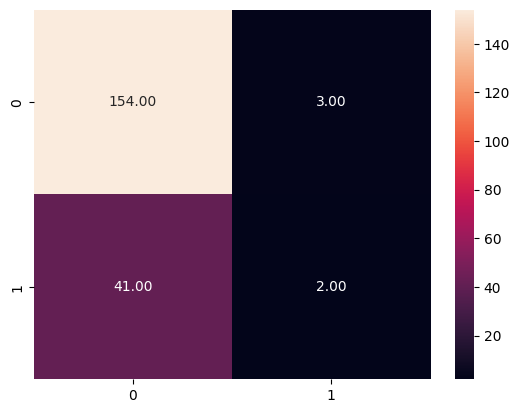

In [34]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True,fmt=".2f")

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.79      0.98      0.87       157
           3       0.40      0.05      0.08        43

    accuracy                           0.78       200
   macro avg       0.59      0.51      0.48       200
weighted avg       0.71      0.78      0.70       200

